# 지도학습 KNN

In [ ]:
import math
from collections import Counter
data=[(7,1,'기린'),
     (4,9,'하마'),
     (9,7,'기린'),
     (1,8,'하마'),
     (7,6,'기린'),
     (4,7,'하마'),
     (6,4,'기린'),
     (2,9,'하마'),
     (3,6,'하마')]

x=int(input("동물의 키는"))
y=int(input("동물의 몸무게는"))
k=int(input('K의 수는? 홀수로'))
def distance_cul(x,y,a,b):
     d=math.sqrt((x-a)**2+(y-b)**2)
     return d
def KNN(x,y,k):
    distance=[]
    for i in data:
         d=distance_cul(x,y,i[0],i[1])
         distance.append((d,i[2]))
    # 오름차순으로 
    distance.sort()
    #최근접 k개
    distance=distance[:k]
    animals=[]
    for i in distance:
         animals.append(i[1])
    x=Counter(animals).most_common(1)
    #most_common은 리스트 안에 담아주니까
    return x[0][0]

print('당신이 입력한 데이터의 동물은 KNN알고리즘에 의해:',KNN(x,y,k))


# 라이브러리 KNN

In [ ]:
#아 나는 KNN 세부적인거 관심 없고 빠르게 빠르게 라이브러리로 하고 싶어! 상태일 때
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

a=load_iris()
x=a.data
y=a.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

#KNN알고리즘을 사이킷런에서 가져와서 빠르게 작업
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN=KNeighborsClassifier(n_neighbors=15)
print(KNN)

KNN.fit(x_train,y_train)
#아까 나눈 테스트 세트로 테스트
result=KNN.predict(x_test)
#테스트 답안(예측)
print(result)
print(y_test)
#정확도 측정
accuracy=metrics.accuracy_score(y_test,result)
print(accuracy*100,'의 정확도')

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

a=load_iris()
x=a.data
y=a.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

KNN=KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train,y_train)

#데이터 안에 target_name이라는 이름으로 포함이 되어있긴 하지만 레이블이 3개 정도로 적기 때문에 딕셔너리를 만들어서 빠르게 작업했음
flowers={0:'setosa',1:'versicolor',2:'virginica'}
new=[[1,2,3,4],[3,4,3,6],[5,2,3,3],[5,5,4,2],[7,3,2,7]]
result=KNN.predict(new)
for i in range(len(new)):
    print(f"{i+1}번째 꽃은 {result[i+1]}")

# 비지도학습 kmeans

In [9]:
#KNN정리
#우리 실생활에서 KNN을 어디에 쓰면 좋을까?

#Kmeans
#비지도 학습
#unsupervised learning
#스스로 데이터를 군집화(클러스터링)

import math
import random
import copy

data=[[6,3],[11,15],[17,12],[24,10],[20,25],[22,30],[85,80],[71,81],[60,79],[56,52],[81,91],[80,81]]
data2=copy.deepcopy(data)

def euclidian(center,i):
    x1,x2=center[0],i[0]
    y1,y2=center[1],i[1]
    return math.sqrt((x2-x1)**2+(y2-y1)**2)

def get_distance(data,center):
    result=[]
    for point in data:
        x=euclidian(center,point)
        result.append(x)
    return result

def Kmeans(c1,c2):
    #모든 점에 대한 자신과의 거리
    dis1=get_distance(data,c1)
    dis2=get_distance(data,c2)
    return (dis1,dis2)


random.shuffle(data2)
center1,center2=data2[0],data2[1]
centerDis1_origin,centerDis2_origin=Kmeans(center1,center2)

isEnd=False
while not isEnd:
    random.shuffle(data2)
    center1,center2=data2[0],data2[1]
    centerDis1_current,centerDis2_current=Kmeans(center1,center2)

    if len(centerDis1_origin)==len(centerDis1_current):
        isSame=True
        for i in range(len(centerDis1_origin)):
            if centerDis1_origin[i]!=centerDis1_current[i]:
                isSame=False
                break
    if isSame:
        isEnd=True
        print(center1,center2)

[71, 81] [11, 15]


# 라이브러리를 활용한 Kmeans 구현

[[16.66666667 15.83333333]
 [72.16666667 77.33333333]]


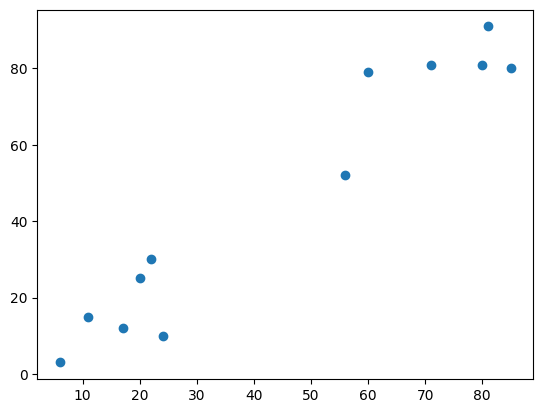

In [14]:
import math
import random
import copy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X=np.array([[6,3],[11,15],[17,12],[24,10],[20,25],[22,30],[85,80],[71,81],[60,79],[56,52],[81,91],[80,81]])
plt.scatter(X[:,0],X[:,1])
#군집 두개 잡아라 => 랜덤하게 두 점 잡고 Kmeans해라
Kmeans=KMeans(n_clusters=2)
Kmeans.fit(X)
print(Kmeans.cluster_centers_)
plt.show()

# kmeans 직접구현

[[6.0, 3.0], [21.0, 27.5], [14.0, 13.5], [24.0, 10.0], [72.16666666666667, 77.33333333333333]]


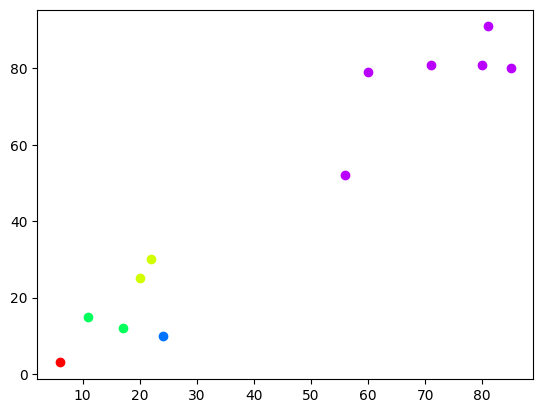

In [29]:
import math
import copy,random
import matplotlib.pyplot as plt
from matplotlib import cm

data=[[6,3],[11,15],[17,12],[24,10],[20,25],[22,30],[85,80],[71,81],[60,79],[56,52],[81,91],[80,81]]
X=np.array([[6,3],[11,15],[17,12],[24,10],[20,25],[22,30],[85,80],[71,81],[60,79],[56,52],[81,91],[80,81]])

def get_center(data):
    sumX=0
    sumY=0
    for i in range(len(data)):
        sumX+=data[i][0]
        sumY+=data[i][1]
    return [sumX/len(data),sumY/len(data)]

def euc(center,i):
    x1,x2=center[0],i[0]
    y1,y2=center[1],i[1]
    return math.sqrt((x2-x1)**2+(y2-y1)**2)

def get_distance(center):
    result=[]
    for i in data:
        x=euc(center,i)
        result.append(x)
    return result
clus=[None for i in range(len(X))]
k=5
center=list(X[:k])
before=[]

while before!=clus:
    #깊은 복사 copy 말고도 이렇게도 가능
    before=list(clus)
    distance=[]
    for i in range(len(center)): #k=2니까 2번
        #센터에서 모든 점들까지의 거리를 구함
        distance.append(get_distance(center[i]))
    for i in range(len(data)):
        minvalue=float('inf')
        minindex=None
        for j in range(len(center)):
            if distance[j][i]<minvalue:
                #각 점당 센터와의 거리를 비교해 가까운 센터로 라벨링해줌
                minvalue=distance[j][i]
                minindex=j
        clus[i]=minindex

    #반복해서 평균좌표로 센터 재지정
    for i in range(len(center)): #할당된 그룹의 좌표의 평균 구해서 기준점을 만든다
        a=[]
        for j in range(len(X)):
            if clus[j]==i:
                a.append(data[j])
        center[i]=get_center(a)
print(center)
colors = [cm.hsv(i / k) for i in range(k)]
for i in range(k):
    x=[]
    y=[]
    for j in range(len(data)):
        if clus[j]==i:
            x.append(data[j][0])
            y.append(data[j][1])
    plt.scatter(x,y,color=colors[i])
plt.show()

In [ ]:
import math
import copy,random
import matplotlib.pyplot as plt
from matplotlib import cm

data=[[6,3],[11,15],[17,12],[24,10],[20,25],[22,30],[85,80],[71,81],[60,79],[56,52],[81,91],[80,81]]
k=2
point=copy.deepcopy(data)
random.shuffle(point)

center1=point[0]
center2=point[1]

def euc_distance(center,i):
    x1,x2=center[0],i[0]
    y1,y2=center[1],i[1]
    return math.sqrt((x2-x1)**2+(y2-y1)**2)

def get_distance(data,center):
    result=[]
    for i in data:
        x=euc_distance(center,i)
        result.append(x)
    return result

def di(clist):#그룹의 중심
    x,y=0,0
    for i in clist:
        x+=i[0]
        y+=i[1]
    return x/len(clist),y/len(clist)
def KMEANS(c1,c2):
    c1_list=[]
    c2_list=[]
    dis1=get_distance(data,c1)
    dis2=get_distance(data,c2)

    for i in range(len(dis1)):
        if dis1[i]<dis2[i]:
            c1_list.append(data[i])
        else:
            c2_list.append(data[i])
    a=di(c1_list)
    b=di(c2_list)
    if c1==a and c2==b:
        return c1,c2
    else:
        return KMEANS(a,b)

print(KMEANS(center1,center2))

TypeError: 'KMeans' object is not callable